In [36]:
import numpy as np
from collections import Counter
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt

### Data load and explore
1. shape and size view
2. nan data check
3. class 

In [27]:
# loading
X_train = np.load('dataset/Assignment2Data/X_train.npy')
X_test = np.load('dataset/Assignment2Data/X_test.npy')
y_train = np.load('dataset/Assignment2Data/y_train.npy')
y_test = np.load('dataset/Assignment2Data/y_test.npy')

# data size and shape
print(f"Train size: {X_train.shape[0]}\nTest size: {X_test.shape[0]}\nImage shape: {X_test.shape[1:]}\n")

# Check nan values
def check_nan(data) -> bool:
    return np.isnan(data).any()

print(f"Nan value exists detect\nX_train: {check_nan(X_train)}\ny_train: {check_nan(y_train)}\nX_test: {check_nan(X_test)}\ny_test: {check_nan(y_test)}\n")

# num of class
cnt_class = Counter(y_train)
print(f"num of class: {cnt_class}")



Train size: 18928
Test size: 4732
Image shape: (28, 28)

Nan value exists detect
X_train: False
y_train: False
X_test: False
y_test: False

num of class: Counter({6: 4201, 10: 2196, 0: 1741, 9: 1682, 5: 1651, 4: 1562, 8: 1546, 7: 1519, 3: 978, 1: 936, 2: 916})
<class 'list'>


 19/592 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  

/home/lxw/miniconda3/envs/ML_Lab/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


592/592 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/tmp/ipykernel_889/4085262070.py:35: RuntimeWarning: divide by zero encountered in divide
  similarity_matrics[i][j] = 1 / distance


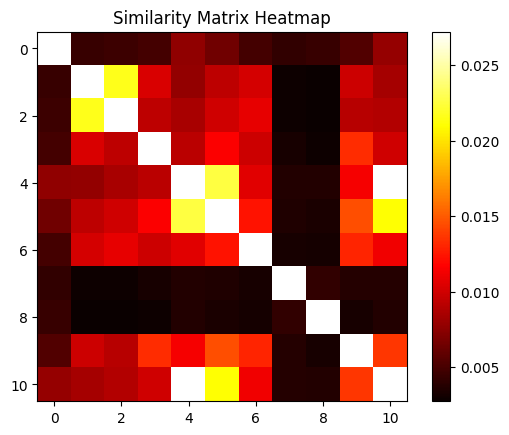

In [48]:
# extract feature for class similarity check

input_shape = (28, 28, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

all_features = model.predict(X_train)

# average feature for each class
feature_dict = {key:[] for key in cnt_class.keys()}
class_avg_feature = {key:None for key in cnt_class.keys()}

for idx, feature in enumerate(all_features):
    feature_dict[y_train[idx]].append(feature)

for key, features in feature_dict.items():
    class_avg_feature[key] = np.mean(features, axis=0)

# calculate similarity
similarity_matrics = np.zeros((11, 11))

sigma = 1.0 # similarity function param

for i in range(11):
    for j in range(11):
        distance = np.linalg.norm(class_avg_feature[i] - class_avg_feature[j])
        similarity_matrics[i][j] = 1 / distance

# hot map visual
plt.imshow(similarity_matrics, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Similarity Matrix Heatmap')
plt.show()  


In [ ]:
# Pre-process

In [ ]:
# Model build

